In [1]:
# Importing all important Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

from IPython import display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from scipy.stats import shapiro,kstest,normaltest

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.preprocessing import LabelEncoder

import json

import pickle

## Problem Statement :

## Data Gathering :

In [2]:
df = pd.read_csv('autos_dataset.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Exploratory Data Analysis :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
df.shape

(205, 26)

In [6]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

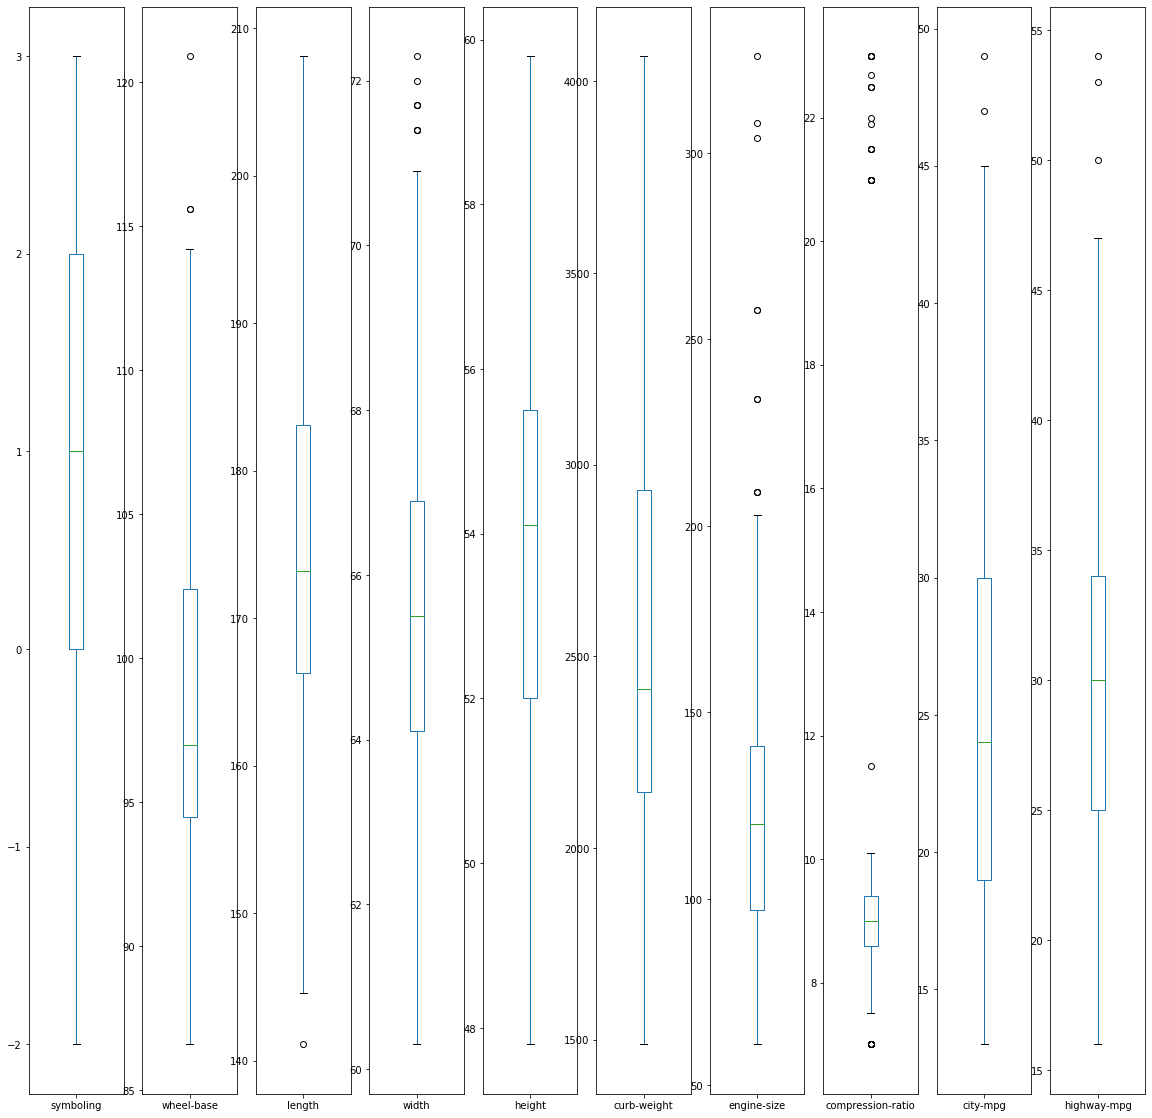

In [8]:
df.plot(kind='box',subplots=True,figsize=(20,20))
plt.show()

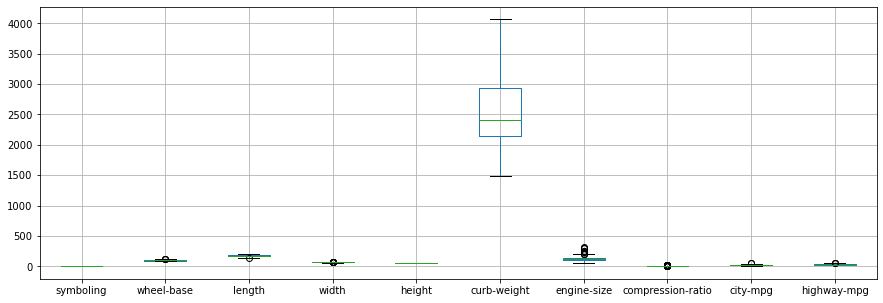

In [9]:
plt.figure(figsize=(15,5))
df.boxplot()

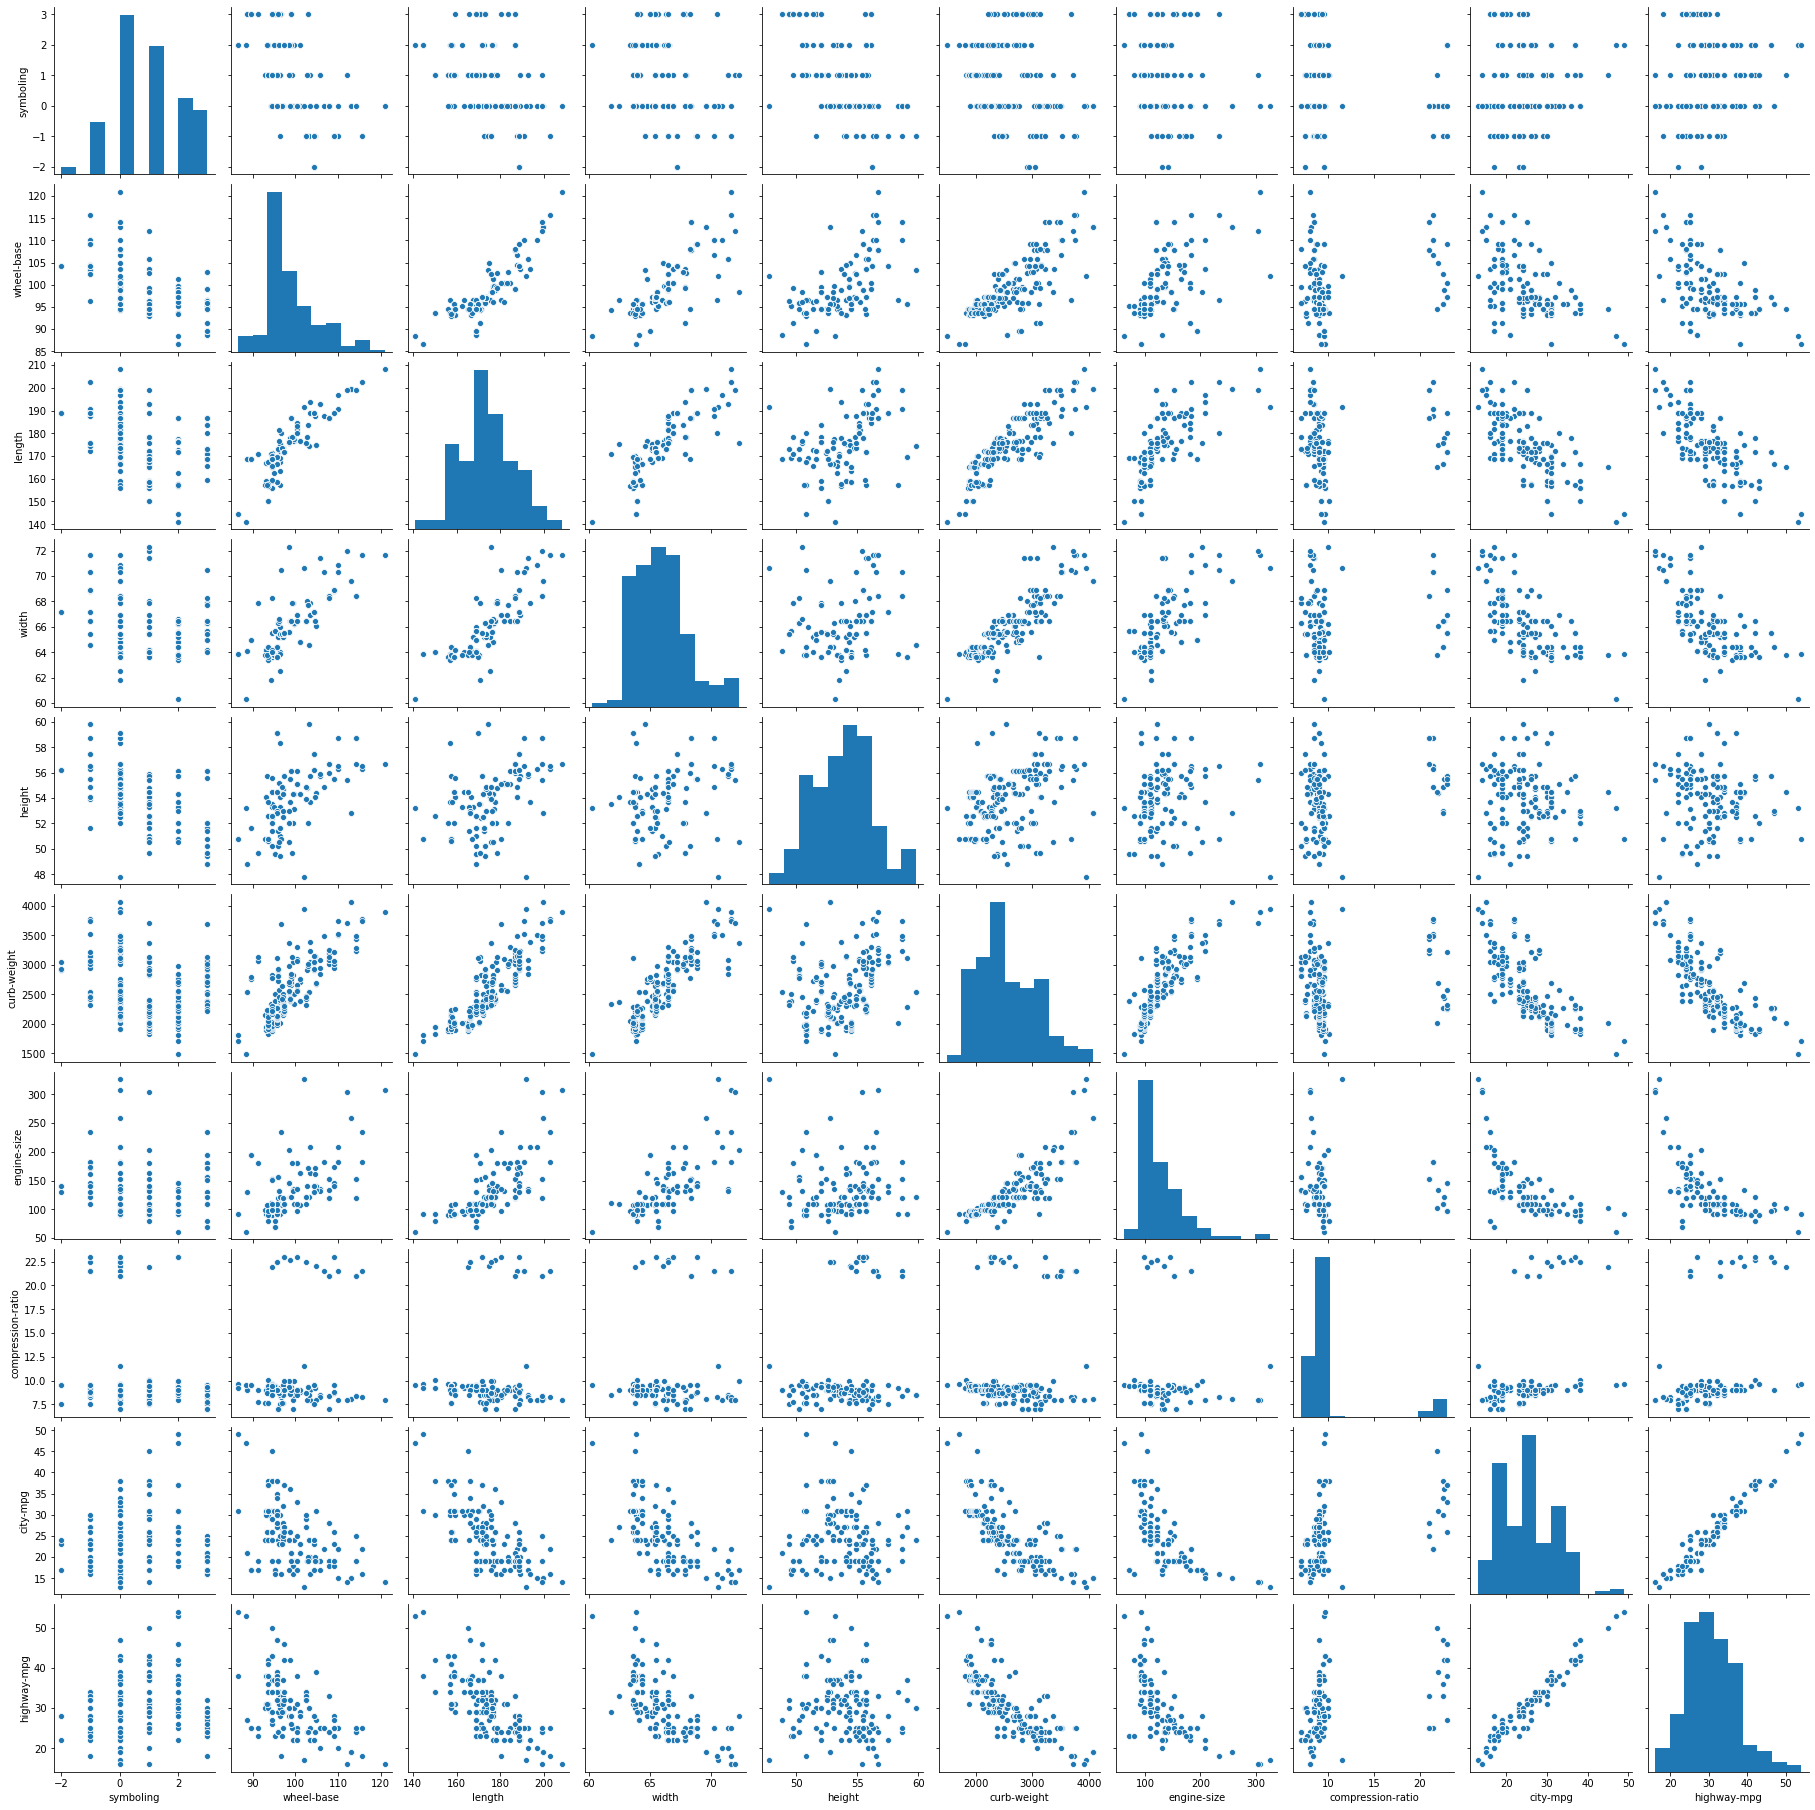

In [10]:
sns.pairplot(df)

In [11]:
df.replace({'?':np.nan},inplace=True)

### Feature Engineering :

## 1. symboling

In [12]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

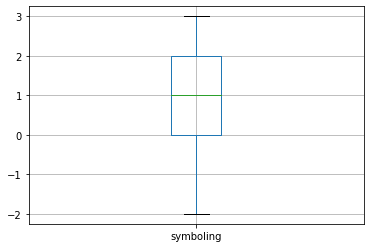

In [13]:
df[['symboling']].boxplot()

## 2. normalized-losses

In [14]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [15]:
df['normalized-losses'].isna().sum()

41

In [16]:
mo = df['normalized-losses'].mode()[0]
mo

'161'

In [17]:
df['normalized-losses'].fillna(mo,inplace=True)

In [18]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'],errors='coerce')

In [19]:
df['normalized-losses'].unique()

array([161, 164, 158, 192, 188, 121,  98,  81, 118, 148, 110, 145, 137,
       101,  78, 106,  85, 107, 104, 113, 150, 129, 115,  93, 142, 153,
       125, 128, 122, 103, 168, 108, 194, 231, 119, 154,  74, 186,  83,
       102,  89,  87,  77,  91, 134,  65, 197,  90,  94, 256,  95],
      dtype=int64)

## 3. make

In [20]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [21]:
df = pd.get_dummies(df,columns=['make'])
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,161,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,161,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,161,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. fuel-type

In [22]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [23]:
df['fuel-type'].replace({'gas':0, 'diesel':1},inplace=True)

In [24]:
df['fuel-type'].unique()

array([0, 1], dtype=int64)

In [25]:
fuel_type_col = {'gas':0, 'diesel':1}
fuel_type_col

{'gas': 0, 'diesel': 1}

## 5. aspiration

In [26]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [27]:
df['aspiration'].replace({'std':0, 'turbo':1},inplace=True)

In [28]:
df['aspiration'].unique()

array([0, 1], dtype=int64)

In [29]:
aspiration_col = {'std':0, 'turbo':1}
aspiration_col

{'std': 0, 'turbo': 1}

## 6. num-of-doors

In [30]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [31]:
df['num-of-doors'].isna().sum()

2

In [32]:
mo = df['num-of-doors'].mode()[0]
mo

'four'

In [33]:
df['num-of-doors'].fillna(mo,inplace=True)

In [34]:
df['num-of-doors'].replace({'two':2, 'four':4},inplace=True)

In [35]:
df['num-of-doors'].unique()

array([2, 4], dtype=int64)

In [36]:
num_of_doors_col = {'two':2, 'four':4}
num_of_doors_col

{'two': 2, 'four': 4}

## 7. body-style

In [37]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [38]:
df = pd.get_dummies(df,columns=['body-style'])
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,161,0,0,2,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3,161,0,0,2,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,161,0,0,2,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,164,0,0,4,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,164,0,0,4,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## 8. drive-wheels

In [39]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [40]:
df['drive-wheels'].replace({'rwd':0, 'fwd':1, '4wd':2},inplace=True)

In [41]:
df['drive-wheels'].unique()

array([0, 1, 2], dtype=int64)

In [42]:
drive_wheels_col = {'rwd':0, 'fwd':1, '4wd':2}
drive_wheels_col

{'rwd': 0, 'fwd': 1, '4wd': 2}

## 9. engine-location

In [43]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [44]:
df['engine-location'].replace({'front':0, 'rear':1},inplace=True)

In [45]:
df['engine-location'].unique()

array([0, 1], dtype=int64)

In [46]:
engine_location_col = {'front':0, 'rear':1}
engine_location_col

{'front': 0, 'rear': 1}

## 10. wheel-base

In [47]:
df['wheel-base'].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

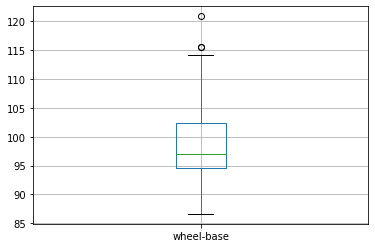

In [48]:
df[['wheel-base']].boxplot()

In [49]:
q1 = df['wheel-base'].quantile(0.25)
q2 = df['wheel-base'].quantile(0.50)
q3 = df['wheel-base'].quantile(0.75)

IQR = q3 - q1
m = df['wheel-base'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

114.25000000000001
82.64999999999999


In [50]:
df['wheel-base'].describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

In [51]:
df['wheel-base'].loc[df['wheel-base']>upper_tail]

70    115.6
71    115.6
73    120.9
Name: wheel-base, dtype: float64

In [52]:
df['wheel-base'].loc[df['wheel-base']>upper_tail]=upper_tail

In [53]:
df['wheel-base'].loc[df['wheel-base']>upper_tail]

Series([], Name: wheel-base, dtype: float64)

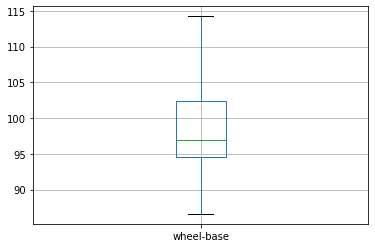

In [54]:
df[['wheel-base']].boxplot()

## 11. length

In [55]:
df['length'].unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

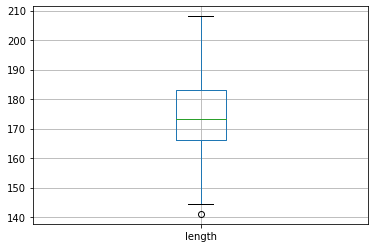

In [56]:
df[['length']].boxplot()

In [57]:
q1 = df['length'].quantile(0.25)
q2 = df['length'].quantile(0.50)
q3 = df['length'].quantile(0.75)

IQR = q3 - q1
m = df['length'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

208.29999999999995
141.10000000000002


In [58]:
df['length'].describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

## 12. width

In [59]:
df['width'].unique()

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

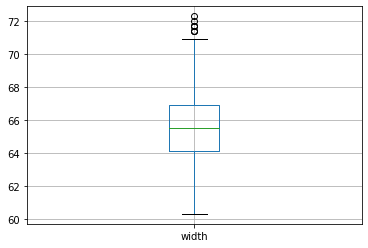

In [60]:
df[['width']].boxplot()

In [61]:
q1 = df['width'].quantile(0.25)
q2 = df['width'].quantile(0.50)
q3 = df['width'].quantile(0.75)

IQR = q3 - q1
m = df['width'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

71.10000000000002
59.89999999999998


In [62]:
df['width'].describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

In [63]:
df['width'].loc[df['width']>upper_tail]

6      71.4
7      71.4
8      71.4
70     71.7
71     71.7
73     71.7
74     72.0
129    72.3
Name: width, dtype: float64

In [64]:
df['width'].loc[df['width']>upper_tail]=upper_tail

In [65]:
df['width'].loc[df['width']>upper_tail]

Series([], Name: width, dtype: float64)

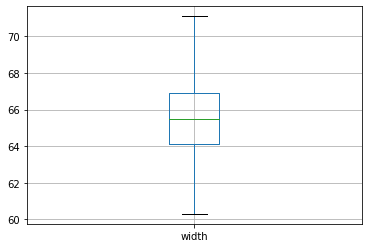

In [66]:
df[['width']].boxplot()

## 13. height

In [67]:
df['height'].unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

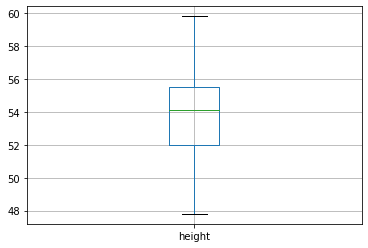

In [68]:
df[['height']].boxplot()

## 14. curb-weight

In [69]:
df['curb-weight'].unique()

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

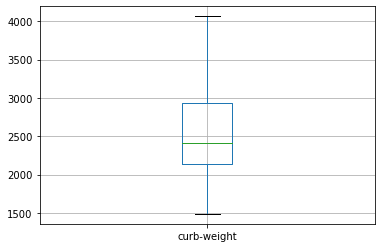

In [70]:
df[['curb-weight']].boxplot()

## 15. engine-type

In [71]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [72]:
df = pd.get_dummies(df,columns=['engine-type'])
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,161,0,0,2,0,0,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,3,161,0,0,2,0,0,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,161,0,0,2,0,0,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,2,164,0,0,4,1,0,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2,164,0,0,4,2,0,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## 16. num-of-cylinders

In [73]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [74]:
df['num-of-cylinders'].replace({'four':4, 'six':6, 'five':5, 'three':3, 
                                'twelve':12, 'two':2, 'eight':8},inplace=True)

In [75]:
df['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [76]:
num_of_cylinders_col = {'four':4, 'six':6, 'five':5, 'three':3, 
                                'twelve':12, 'two':2, 'eight':8}

num_of_cylinders_col

{'four': 4,
 'six': 6,
 'five': 5,
 'three': 3,
 'twelve': 12,
 'two': 2,
 'eight': 8}

## 17. engine-size

In [77]:
df['engine-size'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

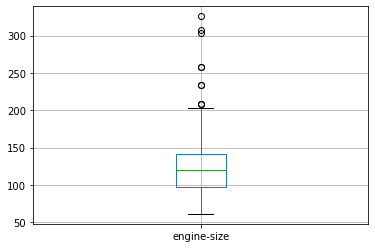

In [78]:
df[['engine-size']].boxplot()

In [79]:
q1 = df['engine-size'].quantile(0.25)
q2 = df['engine-size'].quantile(0.50)
q3 = df['engine-size'].quantile(0.75)

IQR = q3 - q1
m = df['engine-size'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

207.0
31.0


In [80]:
df['engine-size'].describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

In [81]:
df['engine-size'].loc[df['engine-size']>upper_tail]

15    209
16    209
17    209
47    258
48    258
49    326
71    234
72    234
73    308
74    304
Name: engine-size, dtype: int64

In [82]:
df['engine-size'].loc[df['engine-size']>upper_tail]=upper_tail

In [83]:
df['engine-size'].loc[df['engine-size']>upper_tail]

Series([], Name: engine-size, dtype: float64)

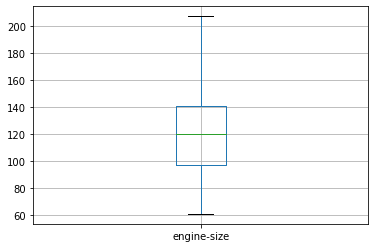

In [84]:
df[['engine-size']].boxplot()

## 18. fuel-system

In [85]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [86]:
df = pd.get_dummies(df,columns=['fuel-system'])
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,161,0,0,2,0,0,88.6,168.8,64.1,48.8,2548,4,130.0,3.47,2.68,9.0,111,5000,21,27,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,161,0,0,2,0,0,88.6,168.8,64.1,48.8,2548,4,130.0,3.47,2.68,9.0,111,5000,21,27,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,161,0,0,2,0,0,94.5,171.2,65.5,52.4,2823,6,152.0,2.68,3.47,9.0,154,5000,19,26,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,164,0,0,4,1,0,99.8,176.6,66.2,54.3,2337,4,109.0,3.19,3.4,10.0,102,5500,24,30,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,164,0,0,4,2,0,99.4,176.6,66.4,54.3,2824,5,136.0,3.19,3.4,8.0,115,5500,18,22,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


## 19. bore

In [87]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [88]:
df['bore'].isna().sum()

4

In [89]:
mo = df['bore'].mode()[0]
mo

'3.62'

In [90]:
df['bore'].fillna(mo,inplace=True)

In [91]:
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')

In [92]:
df['bore'].unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08, 3.39, 3.76, 3.58, 3.46,
       3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.33, 3.7 , 3.61, 3.94, 3.74,
       2.54, 3.05, 3.27, 3.24, 3.01])

## 20. stroke

In [93]:
df['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', nan, '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [94]:
df['stroke'].isna().sum()

4

In [95]:
mo = df['stroke'].mode()[0]
mo

'3.4'

In [96]:
df['stroke'].fillna(mo,inplace=True)

In [97]:
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce') 

In [98]:
df['stroke'].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15, 3.16, 3.64, 3.1 , 3.35, 3.12,
       3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64, 3.08,
       3.5 , 3.54, 2.87])

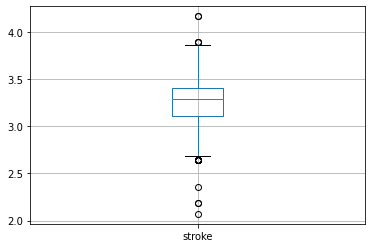

In [99]:
df[['stroke']].boxplot()

## 21. compression-ratio

In [100]:
df['compression-ratio'].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

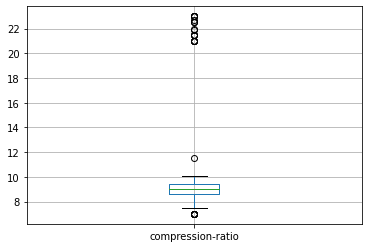

In [101]:
df[['compression-ratio']].boxplot()

In [102]:
q1 = df['compression-ratio'].quantile(0.25)
q2 = df['compression-ratio'].quantile(0.50)
q3 = df['compression-ratio'].quantile(0.75)

IQR = q3 - q1
m = df['compression-ratio'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

10.600000000000001
7.399999999999999


In [103]:
df['compression-ratio'].describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression-ratio, dtype: float64

In [104]:
df['compression-ratio'].loc[df['compression-ratio']>upper_tail]

49     11.5
63     22.7
66     22.0
67     21.5
68     21.5
69     21.5
70     21.5
90     21.9
108    21.0
110    21.0
112    21.0
114    21.0
116    21.0
158    22.5
159    22.5
174    22.5
182    23.0
184    23.0
187    23.0
192    23.0
203    23.0
Name: compression-ratio, dtype: float64

In [105]:
df['compression-ratio'].loc[df['compression-ratio']>upper_tail]=upper_tail

In [106]:
df['compression-ratio'].loc[df['compression-ratio']>upper_tail]

Series([], Name: compression-ratio, dtype: float64)

In [107]:
df['compression-ratio'].loc[df['compression-ratio']<lower_tail]

9      7.0
29     7.0
82     7.0
83     7.0
84     7.0
117    7.0
124    7.0
Name: compression-ratio, dtype: float64

In [108]:
df['compression-ratio'].loc[df['compression-ratio']<lower_tail]=lower_tail

In [109]:
df['compression-ratio'].loc[df['compression-ratio']<lower_tail]

Series([], Name: compression-ratio, dtype: float64)

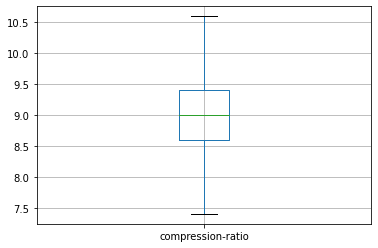

In [110]:
df[['compression-ratio']].boxplot()

## 22. horsepower

In [111]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

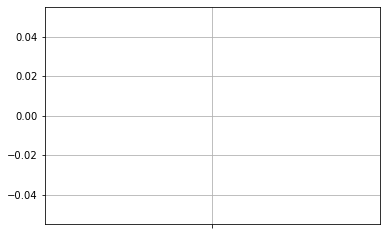

In [112]:
df[['horsepower']].boxplot()

In [113]:
df['horsepower'].isna().sum()

2

In [114]:
mo = df['horsepower'].mode()[0]
mo

'68'

In [115]:
df['horsepower'].fillna(mo,inplace=True)

In [116]:
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')

In [117]:
df['horsepower'].isna().sum()

0

In [118]:
df['horsepower'].unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106], dtype=int64)

## 23. peak-rpm

In [119]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', nan, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [120]:
df['peak-rpm'].isna().sum()

2

In [121]:
mo = df['peak-rpm'].mode()[0]
mo

'5500'

In [122]:
df['peak-rpm'].fillna(mo,inplace=True)

In [123]:
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')

In [124]:
df['peak-rpm'].unique()

array([5000, 5500, 5800, 4250, 5400, 5100, 4800, 6000, 4750, 4650, 4200,
       4350, 4500, 5200, 4150, 5600, 5900, 5750, 5250, 4900, 4400, 6600,
       5300], dtype=int64)

## 24. city-mpg

In [125]:
df['city-mpg'].unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

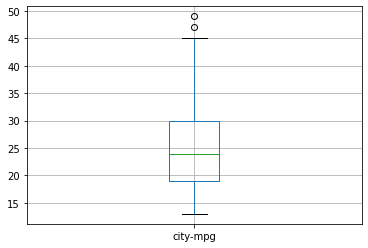

In [126]:
df[['city-mpg']].boxplot()

In [127]:
q1 = df['city-mpg'].quantile(0.25)
q2 = df['city-mpg'].quantile(0.50)
q3 = df['city-mpg'].quantile(0.75)

IQR = q3 - q1
m = df['city-mpg'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

46.5
2.5


In [128]:
df['city-mpg'].describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

In [129]:
df['city-mpg'].loc[df['city-mpg']>upper_tail]

18    47
30    49
Name: city-mpg, dtype: int64

In [130]:
df['city-mpg'].loc[df['city-mpg']>upper_tail]=upper_tail

In [131]:
df['city-mpg'].loc[df['city-mpg']>upper_tail]

Series([], Name: city-mpg, dtype: float64)

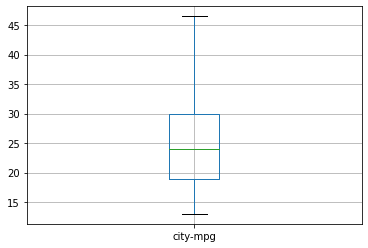

In [132]:
df[['city-mpg']].boxplot()

## 25. highway-mpg

In [133]:
df['highway-mpg'].unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

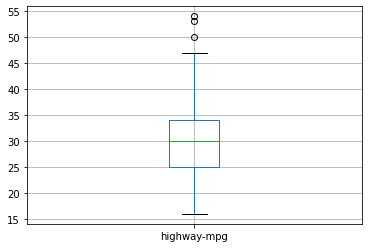

In [134]:
df[['highway-mpg']].boxplot()

In [135]:
q1 = df['highway-mpg'].quantile(0.25)
q2 = df['highway-mpg'].quantile(0.50)
q3 = df['highway-mpg'].quantile(0.75)

IQR = q3 - q1
m = df['highway-mpg'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

47.5
11.5


In [136]:
df['highway-mpg'].describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64

In [137]:
df['highway-mpg'].loc[df['highway-mpg']>upper_tail]

18    53
30    54
90    50
Name: highway-mpg, dtype: int64

In [138]:
df['highway-mpg'].loc[df['highway-mpg']>upper_tail]=upper_tail

In [139]:
df['highway-mpg'].loc[df['highway-mpg']>upper_tail]

Series([], Name: highway-mpg, dtype: float64)

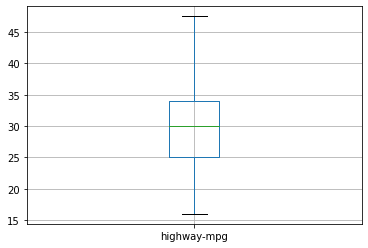

In [140]:
df[['highway-mpg']].boxplot()

## 26. price

In [141]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


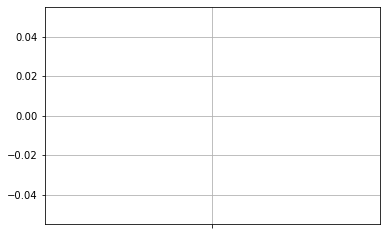

In [142]:
df[['price']].boxplot()

In [143]:
df['price'].isna().sum()

4

In [144]:
mo = df['price'].mode()[0]
mo

'13499'

In [145]:
df['price'].fillna(mo,inplace=True)

In [146]:
df['price'] = pd.to_numeric(df['price'],errors='coerce')

In [147]:
df['price'].unique()

array([13495, 16500, 13950, 17450, 15250, 17710, 18920, 23875, 13499,
       16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,
        6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,  8558,
        8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,  7895,
        9095,  8845, 10295, 12945, 10345,  6785, 11048, 32250, 35550,
       36000,  5195,  6095,  6795,  6695,  7395, 10945, 11845, 13645,
       15645,  8495, 10595, 10245, 10795, 11245, 18280, 18344, 25552,
       28248, 28176, 31600, 34184, 35056, 40960, 45400, 16503,  5389,
        6189,  6669,  7689,  9959,  8499, 12629, 14869, 14489,  6989,
        8189,  9279,  5499,  7099,  6649,  6849,  7349,  7299,  7799,
        7499,  7999,  8249,  8949,  9549, 14399, 17199, 19699, 18399,
       11900, 13200, 12440, 13860, 15580, 16900, 16695, 17075, 16630,
       17950, 18150, 12764, 22018, 32528, 34028, 37028,  9295,  9895,
       11850, 12170, 15040, 15510, 18620,  5118,  7053,  7603,  7126,
        7775,  9960,

## 27. stroke

In [148]:
df['stroke'].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15, 3.16, 3.64, 3.1 , 3.35, 3.12,
       3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64, 3.08,
       3.5 , 3.54, 2.87])

In [149]:
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')

In [150]:
df['stroke'].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15, 3.16, 3.64, 3.1 , 3.35, 3.12,
       3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64, 3.08,
       3.5 , 3.54, 2.87])

In [151]:
df.drop(['symboling','length','height','curb-weight'],axis=1,inplace=True)

## Feature Selection :

## Linearity :

In [152]:
r = df.corr()[['price']]
r

,price
normalized-losses,0.317097
fuel-type,0.109967
aspiration,0.177413
num-of-doors,0.041482
drive-wheels,-0.576431
engine-location,0.330920
wheel-base,0.571541
width,0.728059
num-of-cylinders,0.688346
engine-size,0.835494


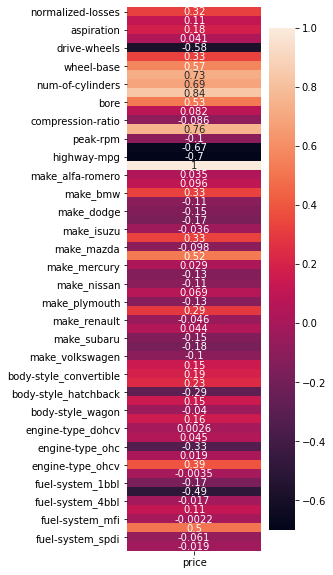

In [153]:
plt.figure(figsize=(3,10))
sns.heatmap(r,annot=True)

## Multicolinearity 

In [154]:
df1 = df.drop('price',axis = 1)
df1.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,width,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,161,0,0,2,0,0,88.6,64.1,4,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,161,0,0,2,0,0,88.6,64.1,4,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,161,0,0,2,0,0,94.5,65.5,6,152.0,2.68,3.47,9.0,154,5000,19.0,26.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,164,0,0,4,1,0,99.8,66.2,4,109.0,3.19,3.40,10.0,102,5500,24.0,30.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,164,0,0,4,2,0,99.4,66.4,5,136.0,3.19,3.40,8.0,115,5500,18.0,22.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [155]:
vif_list = []

for i in range(df1.shape[1]):
    
    vif = variance_inflation_factor(df1.values,i)
    
    vif_list.append(vif)
    
print(vif_list)

[3.555804739912862, inf, 5.734606177106333, 3.43068637861378, 6.049707957891139, inf, 11.07560059468554, 12.024402159268117, 17.43450731416344, 29.875832858383248, 7.335964006471371, 5.41749195335475, 6.086126762381936, 39.37490695085839, 5.947719961464643, 40.80442921525378, 35.17215217354116, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


## Model Building :

In [156]:
x = df.drop('price',axis = 1)

y = df['price']

In [157]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [158]:
model = LinearRegression()

In [159]:
model.fit(x_train,y_train)

LinearRegression()

In [160]:
y_pred_test = model.predict(x_test)

y_pred_train = model.predict(x_train)

## Model Evaluation :

In [161]:
# for testing 

mse = mean_squared_error(y_test,y_pred_test)

rmse = np.sqrt(mse)

mae_test = mean_absolute_error(y_test,y_pred_test)

acc = r2_score(y_test,y_pred_test)

print(mse)

print(rmse)

print(mae_test)

print('Testing Accuracy :',round(acc,2))

10885344.119500363
3299.2944881444523
2364.031498095026
Testing Accuracy : 0.81


In [162]:
# for training 

mse = mean_squared_error(y_train,y_pred_train)

rmse = np.sqrt(mse)

mae_train = mean_absolute_error(y_train,y_pred_train)

acc = r2_score(y_train,y_pred_train)

print(mse)

print(rmse)

print(mae_train)

print('Training Accuracy :',round(acc,2))

2596455.5683616935
1611.3520932315487
1109.56957870141
Training Accuracy : 0.96


## Normality Of Residual

In [163]:
residual = y_train - y_pred_train
residual

4      2.440350e+03
28    -5.168390e+02
100   -1.297589e+03
112    1.357725e+03
155    3.495084e+03
175   -1.953149e+01
69    -1.860586e+02
179   -1.722623e+03
61    -6.304507e+02
91    -9.266859e+01
29    -2.160959e-09
104    1.299632e+03
171    1.877290e+02
187    7.166031e+02
143   -1.017552e+01
180   -7.182201e+02
89    -1.242669e+03
38    -2.677078e+02
82     5.783759e+02
190    3.699940e+02
153    7.039596e+02
202    1.998212e+02
172    2.024683e+03
76    -5.626277e+02
188    2.751535e+03
102   -4.142243e+02
191   -1.283352e+03
165    3.255147e+02
34     9.035176e+01
117   -7.830190e+02
97     1.557703e+03
197    1.195179e+03
66     5.278743e+03
141   -1.957539e+03
16     8.913923e+03
113    8.497841e+02
94     5.573314e+02
90    -1.233406e+03
183   -8.099318e+02
128   -9.606673e+02
43    -4.874892e-10
30     1.471922e+03
169   -1.372271e+03
99    -1.623268e+03
1      1.177608e+02
156   -5.890994e+02
96     6.508761e+02
85    -1.603112e+03
21     1.769240e+02
116    2.407725e+03


## 1. kdeplot

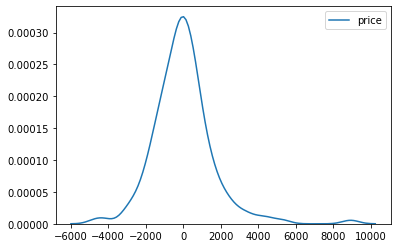

In [164]:
sns.kdeplot(residual)

## 2. qqplot

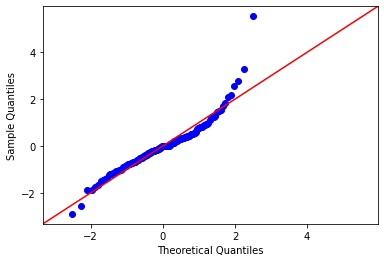

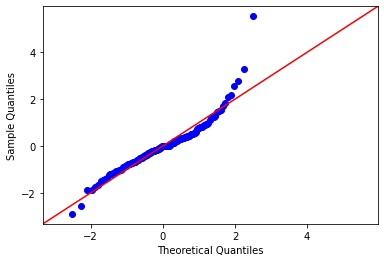

In [165]:
sm.qqplot(residual,line='45',fit=True)

## 3. Hypothesis Testing :

#### 1. shapiro test :

In [166]:
_,p_value = shapiro(residual)

print('p_value :',p_value)

if p_value >= 0.05:
    
    print('Residual is Normally Distributed...')
    
else :
    
    print('Residual is Not Noramlly Distributed...')  

p_value : 6.964222620808869e-08
Residual is Not Noramlly Distributed...


#### 2. kstest 

In [167]:
_,p_value = kstest(residual,'norm')

print('p_value :',p_value)

if p_value >= 0.05 :
    
    print('Residual is Normally Distributed ...')
    
else :
    
    print('Residual is Not Normally Distributed ....')

p_value : 1.8848096699172693e-40
Residual is Not Normally Distributed ....


#### 3. normaltest

In [168]:
_,p_value = normaltest(residual)

print('p_value :',p_value)

if p_value >= 0.05:
    
    print('Residual is Normally Distributed...')
    
else :
    
    print('Residual is Not Normally Distributed...')

p_value : 2.220295057318813e-13
Residual is Not Normally Distributed...


## Skewness :

In [169]:
skewness = residual.skew()

print('Skewness :',skewness)

if (skewness >= 0.5) or (skewness <= -0.5):
    
    print('Residual is Normally Distributed....')
    
elif skewness < -0.05:
    
    print('There is Negatively Skewed distribution of Residual....')
    
else :
    
    print('There is Positively skewed distribution of Residual...')


Skewness : 1.2354724933387835
Residual is Normally Distributed....


## Dictionary of Encoded Columns :

In [170]:
column_names = x.columns
column_names

Index(['normalized-losses', 'fuel-type', 'aspiration', 'num-of-doors',
       'drive-wheels', 'engine-location', 'wheel-base', 'width',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-syst

In [171]:
json_data = {'fuel_type':fuel_type_col,'aspiration':aspiration_col,'num_of_doors':num_of_doors_col,
             'drive_wheels':drive_wheels_col,'engine_location':engine_location_col,
             'num_of_cylinders':num_of_cylinders_col,'column_names':list(x.columns)}
json_data

{'fuel_type': {'gas': 0, 'diesel': 1},
 'aspiration': {'std': 0, 'turbo': 1},
 'num_of_doors': {'two': 2, 'four': 4},
 'drive_wheels': {'rwd': 0, 'fwd': 1, '4wd': 2},
 'engine_location': {'front': 0, 'rear': 1},
 'num_of_cylinders': {'four': 4,
  'six': 6,
  'five': 5,
  'three': 3,
  'twelve': 12,
  'two': 2,
  'eight': 8},
 'column_names': ['normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'width',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'make_alfa-romero',
  'make_audi',
  'make_bmw',
  'make_chevrolet',
  'make_dodge',
  'make_honda',
  'make_isuzu',
  'make_jaguar',
  'make_mazda',
  'make_mercedes-benz',
  'make_mercury',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_plymouth',
  'make_porsche',
  'make_renault',
  'make_saab',
  'make_subaru',
  'make_toyota',
  'make_volkswagen',


In [172]:
# saving dictionary into json file

with open('Autodataset.json','w') as f:
    json.dump(json_data,f)

In [173]:
# saving model into pickle file

with open('Autodatset.pkl','wb') as f :
    pickle.dump(model,f)

### Single User input Testing :

In [174]:
x.head(1).T

,0
normalized-losses,161.00
fuel-type,0.00
aspiration,0.00
num-of-doors,2.00
drive-wheels,0.00
engine-location,0.00
wheel-base,88.60
width,64.10
num-of-cylinders,4.00
engine-size,130.00


In [175]:
normalized_losses = 161.00
fuel_type = 'gas'
aspiration = 'std'
num_of_doors = 'two'
drive_wheels = 'rwd'
engine_location = 'front'
wheel_base = 88.60
width = 64.10
num_of_cylinders = 'four'
engine_size = 130.00
bore = 3.47
stroke = 2.68
compression_ratio = 9.00
horsepower = 111.00
peak_rpm = 5000.00
city_mpg = 21.00
highway_mpg = 27.00

make = 'alfa_romero'
make = 'make_' + make
# make_index = list(x.columns).index(make)
make_index = np.where(column_names==make)[0]

body_style = 'convertible'
body_style = 'body_style_' + body_style
# body_style_index = list(x.columns).index(body_style)
body_style_index = np.where(column_names==body_style)[0]

engine_type = 'dohc'
engine_type = 'engine_type_' + engine_type
# engine_type_index = list(x.columns).index(engine_type)
engine_type_index = np.where(column_names==engine_type)[0]

fuel_system = '1bbl'
fuel_system = 'fuel_system_' + fuel_system
# fuel_system_index = list(x.columns).index(fuel_system)
fuel_system_index = np.where(column_names==fuel_system)[0]


In [176]:
array = np.zeros(len(x.columns))
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [177]:
array = np.zeros(x.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [178]:
array[0] = normalized_losses
array[1] = json_data['fuel_type'][fuel_type]
array[2] = json_data['aspiration'][aspiration]
array[3] = json_data['num_of_doors'][num_of_doors]
array[4] = json_data['drive_wheels'][drive_wheels]
array[5] = json_data['engine_location'][engine_location]
array[6] = wheel_base
array[7] = width
array[8] = json_data['num_of_cylinders'][num_of_cylinders]
array[9] = engine_size
array[10] = bore
array[11] = stroke
array[12] = compression_ratio
array[13] = horsepower
array[14] = peak_rpm
array[15] = city_mpg
array[16] = highway_mpg

array[make_index] == 1
array[body_style_index] == 1 
array[engine_type_index] == 1
array[fuel_system_index] == 1

array

array([1.61e+02, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00,
       8.86e+01, 6.41e+01, 4.00e+00, 1.30e+02, 3.47e+00, 2.68e+00,
       9.00e+00, 1.11e+02, 5.00e+03, 2.10e+01, 2.70e+01, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00])

In [183]:
predict = model.predict([array])[0]
print('Price of Car is : $',round(predict,2))

Price of Car is : $ 9397.55


In [179]:
df.dtypes

normalized-losses           int64
fuel-type                   int64
aspiration                  int64
num-of-doors                int64
drive-wheels                int64
engine-location             int64
wheel-base                float64
width                     float64
num-of-cylinders            int64
engine-size               float64
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                  int64
peak-rpm                    int64
city-mpg                  float64
highway-mpg               float64
price                       int64
make_alfa-romero            uint8
make_audi                   uint8
make_bmw                    uint8
make_chevrolet              uint8
make_dodge                  uint8
make_honda                  uint8
make_isuzu                  uint8
make_jaguar                 uint8
make_mazda                  uint8
make_mercedes-benz          uint8
make_mercury                uint8
make_mitsubish

In [180]:
df.isna().sum()

normalized-losses         0
fuel-type                 0
aspiration                0
num-of-doors              0
drive-wheels              0
engine-location           0
wheel-base                0
width                     0
num-of-cylinders          0
engine-size               0
bore                      0
stroke                    0
compression-ratio         0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
price                     0
make_alfa-romero          0
make_audi                 0
make_bmw                  0
make_chevrolet            0
make_dodge                0
make_honda                0
make_isuzu                0
make_jaguar               0
make_mazda                0
make_mercedes-benz        0
make_mercury              0
make_mitsubishi           0
make_nissan               0
make_peugot               0
make_plymouth             0
make_porsche              0
make_renault              0
make_saab           